   # Mobile Price Classification 


### Data information

- id : ID
- battery_power : Energie totale qu'une batterie peut stocker en une seule fois                   mesurée en mAh
- blue : A bluetooth ou pas
- clock_speed : vitesse du microprocesseur
- dual_sim : Supporte deux cartes sim ou pas
- fc : Appareil photo devant mega pixels
- four_g : a la 4G ou pas
- int_memory: Memoire interne en Gigabytes
- m_dep: Profondeur Mobile en cm
- mobile_wt: Poid du téléphone portable
- n_cores:Nombre de coeurs de processeur
- pc: Méga pixels de l'appareil photo principal
- px_height: Hauteur de résolution de pixel
- px_width: Largeur de résolution de pixel
- ram: Random Access Memory en Megabytes
- sc_h: Hauteur de l'écran du mobile en cm
- sc_w: Largeur de l'écran du mobile en cm
- talk_time: La plus longue durée d'une seule charge de batterie lorsque vous
- three_g: A 3G ou pas 
- touch_screen: Possède un écran tactile ou non
- wifi: A le wifi ou pas

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [11]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [10]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [13]:
df_train.shape

(2000, 21)

In [14]:
df_test.shape

(1000, 21)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [82]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [83]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Quelques visualisations

In [169]:
print(df_train.price_range.value_counts())
print(df_train.blue.value_counts())
print(df_train.dual_sim.value_counts())
print(df_train.four_g.value_counts())
print(df_train.three_g.value_counts())
print(df_train.wifi.value_counts())
print(df_train.touch_screen.value_counts())

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64
0    1010
1     990
Name: blue, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64


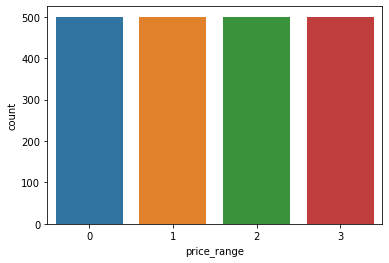

In [57]:
sns.countplot(df_train['price_range'])

In [170]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


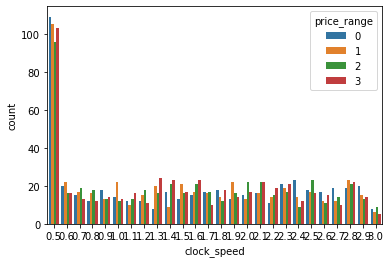

In [59]:
sns.countplot(df_train['clock_speed'],hue=df_train['price_range'])

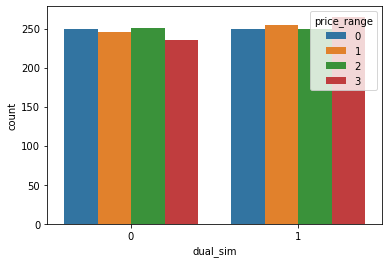

In [61]:
sns.countplot(df_train['dual_sim'],hue=df_train['price_range'])

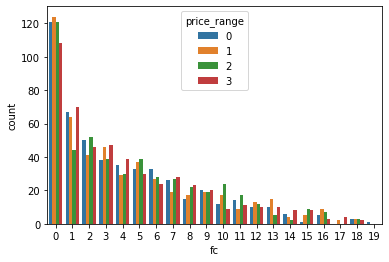

In [64]:
#Fc : Front camera mega pixels 
sns.countplot(df_train['fc'],hue=df_train['price_range'])

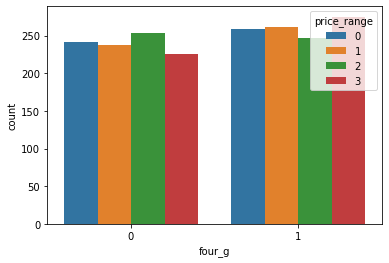

In [65]:
sns.countplot(df_train['four_g'],hue=df_train['price_range'])

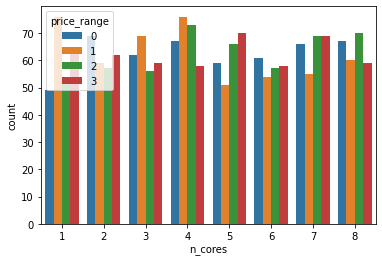

In [67]:
sns.countplot(df_train['n_cores'],hue=df_train['price_range'])

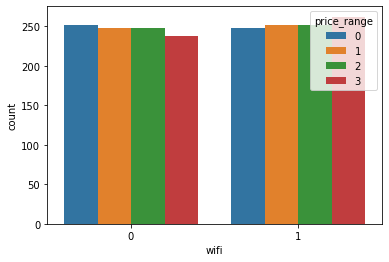

In [68]:
sns.countplot(df_train['wifi'],hue=df_train['price_range'])

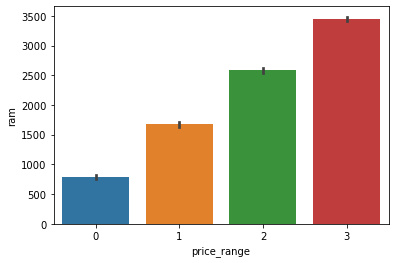

In [18]:
sns.barplot(x='price_range', y='ram', data=df_train)

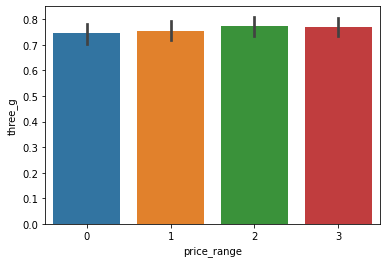

In [84]:
sns.barplot(x='price_range', y='three_g', data=df_train)

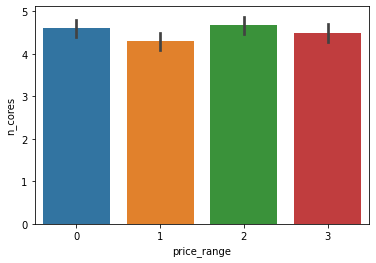

In [87]:
sns.barplot(x='price_range', y='n_cores', data=df_train)

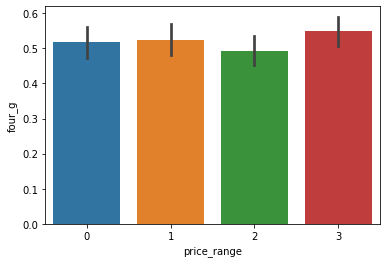

In [85]:
sns.barplot(x='price_range', y='four_g', data=df_train)

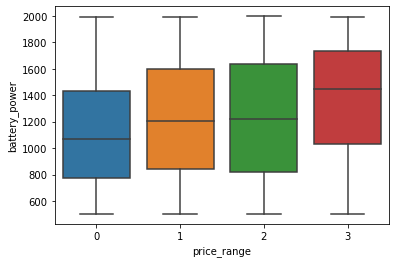

In [96]:
sns.boxplot(x='price_range', y='battery_power', data=df_train)

Text(0.5, 0, 'MegaPixels')

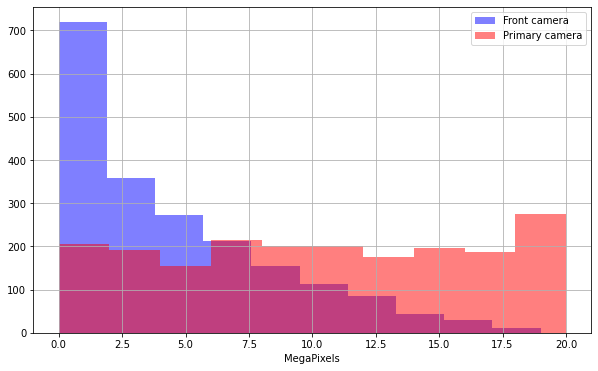

In [94]:
# No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend();
plt.xlabel('MegaPixels')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023684C4FAF0>,
      dtype=object)

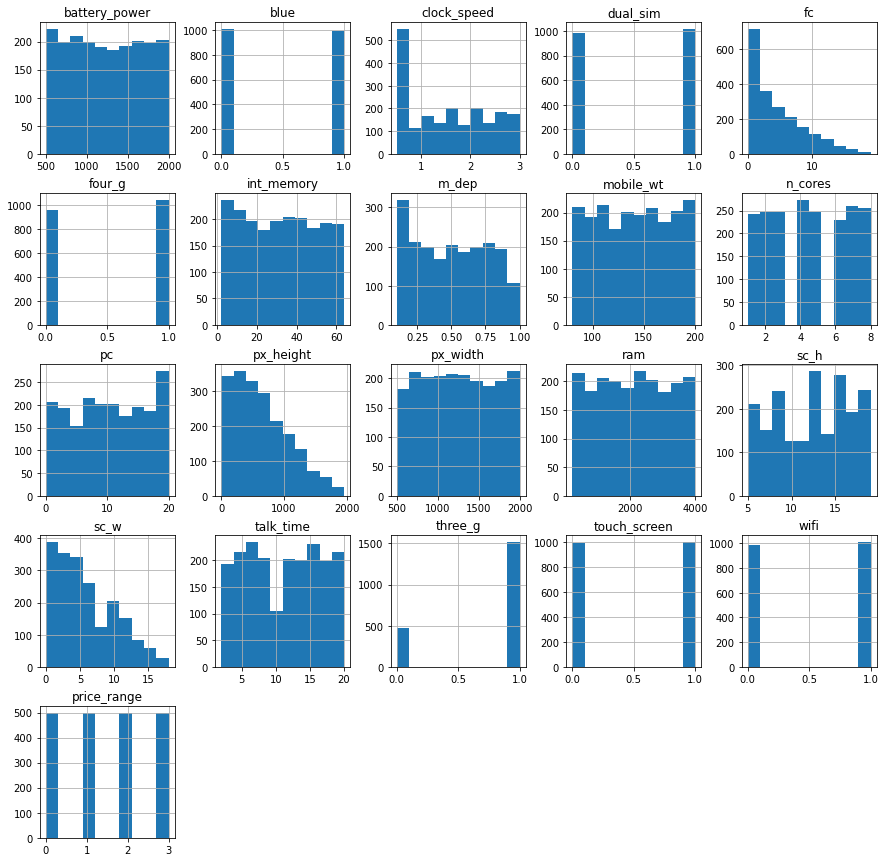

In [113]:
df_train.hist(figsize=(15,15))

([<matplotlib.patches.Wedge at 0x23686fa57f0>,
 [Text(-0.749214765200941, -0.8054050133969238, '3 g support '),
  Text(0.749214765200941, 0.8054050133969237, 'not support')],
 [Text(-0.40866259920051323, -0.43931182548923114, '76.2%'),
  Text(0.40866259920051323, 0.4393118254892311, '23.8%')])

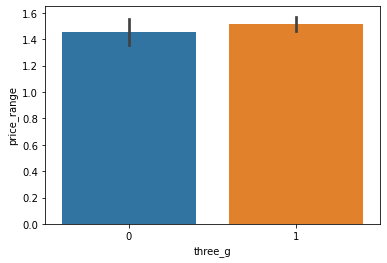

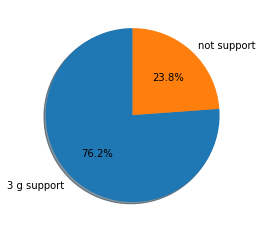

In [116]:
sns.barplot(x='three_g',y='price_range',data=df_train)
#check three g support or not using barplot
label=['3 g support ','not support']
values=df_train['three_g'].value_counts().values
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2368568fbe0>,
 [Text(-1.097491732278043, -0.07424215501546373, '4-g support'),
  Text(1.0974917322780433, 0.07424215501546359, 'not-support')],
 [Text(-0.5986318539698416, -0.04049572091752567, '52.1%'),
  Text(0.5986318539698418, 0.040495720917525596, '47.9%')])

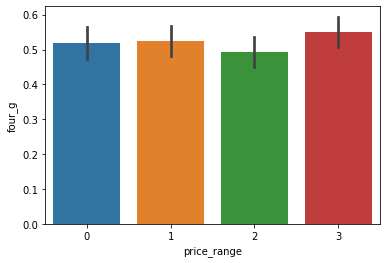

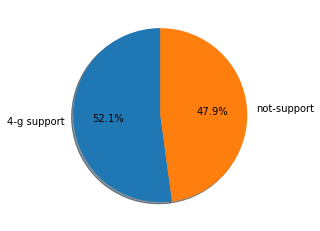

In [117]:
df_train.head(1)
sns.barplot(x='price_range',y='four_g',data=df_train)
label=['4-g support','not-support']
values=df_train['four_g'].value_counts().values
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')

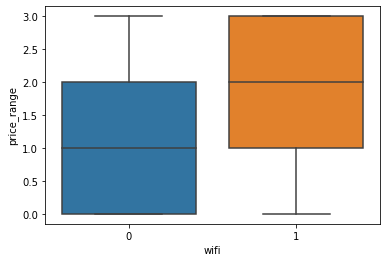

In [140]:
sns.boxplot(x='wifi',y='price_range',data=df_train)

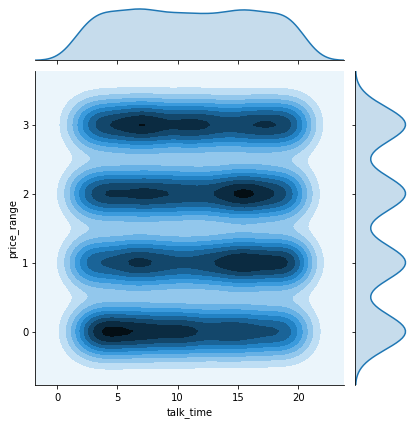

In [200]:
sns.jointplot(x='talk_time',y='price_range',data=df_train,kind='kde')

## Random Forest Model

In [144]:
df_train.head(1)
x=df_train.drop('price_range',axis=1)
y=(df_train['price_range'])

In [201]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [204]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.2)

In [149]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2)
rfc.fit(X_train,y_train)
Y_pred=rfc.predict(X_test)
print('y predicted',Y_pred)
rfc.score(X_train,y_train)

y predicted [3 0 2 1 2 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 1 0 1 0 2 3 0
 0 3 3 2 1 3 2 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 3 3 2 2 2 3 2 1 0
 1 3 2 2 2 1 3 3 3 0 0 0 2 0 2 3 1 3 2 0 0 3 3 3 0 3 1 2 3 1 3 1 2 3 2 3 3
 0 0 1 3 3 0 1 1 0 0 3 2 2 1 2 1 1 0 2 1 3 2 3 3 3 3 1 0 1 1 2 2 3 0 3 0 0
 2 0 1 1 1 1 3 1 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 2 2 3 3 0 2 2 3 0 2 1 0 1 3
 1 2 0 2 3 1 1 0 2 3 0 1 2 2 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 2 0 2 0 0 0 3 3 0 2 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 2
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 1 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 0 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 1 2 1 1 2 0 1 0 3 1 0 3 1 0
 1 2 0 3 2 2 0 1 3 0 1 1 1 2 1 2 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 1 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 0]


1.0

In [157]:
rfc.score(X_test,y_test)

0.8775

In [206]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
61,799,1,2.3,0,1,1,63,0.8,144,8,6,361,975,431,15,6,6,1,1,1
853,1195,1,1.1,1,2,1,8,0.9,80,6,6,327,1001,643,14,2,19,1,0,0
680,658,1,2.7,0,0,1,12,0.9,103,7,3,1156,1750,3587,14,11,20,1,0,0
455,1747,1,0.9,0,6,1,48,0.7,94,3,19,947,1131,2362,17,2,19,1,1,0
130,1414,0,2.0,1,2,0,54,0.8,99,7,3,262,829,3799,17,7,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1166,1,0.5,0,7,0,59,0.5,80,1,11,437,638,3887,8,6,7,1,0,1
1862,1043,0,2.7,0,3,0,29,0.2,83,8,17,887,893,1183,5,3,8,1,0,0
1361,1549,1,1.5,1,0,1,27,0.4,113,5,7,632,1162,436,10,8,11,1,0,0
1547,1611,0,0.5,1,4,1,27,0.9,199,1,10,163,1011,3078,15,2,6,1,0,1


In [158]:
pd.crosstab(y_test,Y_pred)

col_0,0,1,2,3
price_range,,,,
0,92,3,0,0
1,7,74,11,0
2,0,14,79,6
3,0,0,8,106


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.fit(X_test,y_test)
Y_pred=xgb_model.predict(X_test)
Y_pred

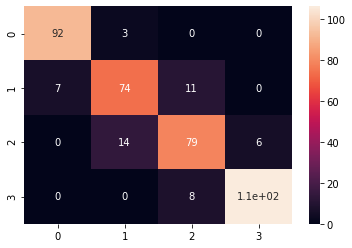

In [163]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
sns.heatmap(confusion_matrix(y_test,Y_pred),annot=True)

In [164]:
accuracy_score(y_test,Y_pred,normalize=False)

351

In [165]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        95
           1       0.81      0.80      0.81        92
           2       0.81      0.80      0.80        99
           3       0.95      0.93      0.94       114

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



## Splitting Dataset 

Splitting dataset into train, test and validation.

In [172]:
label = 'price_range'

X = df_train.drop(['price_range'], axis=1) 
y = df_train[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## DecisionTreeClassifier


In [173]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

train_score = dtree_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

validation_score = dtree_model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = dtree_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 100.0
Validation score of trained model: 79.6969696969697
Test score of trained model: 84.84848484848484


In [174]:
y_predictions = dtree_model.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)
print("Confusion Matrix")
print(conf_matrix)
print("\n")
print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')

Confusion Matrix
[[74  5  0  0]
 [13 52  6  0]
 [ 0 11 84  8]
 [ 0  2  5 70]]


Accuracy: 84.84848484848484


In [175]:
print(f'Test score of trained DecisionTreeClassifier model: {dtree_model.score(X_test, y_test)*100}')

Test score of trained DecisionTreeClassifier model: 84.84848484848484


In [176]:
print(classification_report(y_predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        79
           1       0.74      0.73      0.74        71
           2       0.88      0.82      0.85       103
           3       0.90      0.91      0.90        77

    accuracy                           0.85       330
   macro avg       0.84      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



## Visualization of DecisionTreeClassifier

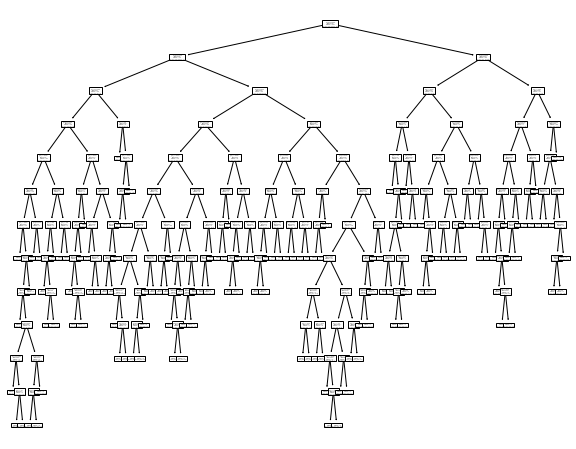

In [182]:
plt.figure(figsize=(10,8))
tree.plot_tree(dtree_model) 
plt.show()

In [178]:
dtree_model.predict(X_test)

array([2, 0, 2, 1, 3, 2, 3, 3, 3, 1, 2, 0, 1, 2, 1, 0, 3, 1, 2, 1, 2, 3,
       3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 3, 0, 3, 0, 0, 1, 0, 2, 2, 0, 3, 2,
       1, 0, 3, 3, 2, 1, 2, 0, 1, 2, 3, 1, 2, 0, 2, 3, 2, 2, 3, 2, 0, 2,
       1, 2, 1, 2, 2, 3, 2, 2, 1, 3, 0, 2, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2,
       3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 3, 0, 1, 1, 2, 3, 2, 2, 0, 0,
       1, 3, 2, 0, 3, 1, 2, 0, 2, 0, 2, 3, 1, 1, 2, 2, 3, 2, 1, 3, 1, 2,
       1, 1, 3, 2, 2, 0, 0, 0, 3, 2, 2, 2, 0, 0, 1, 3, 1, 1, 1, 0, 0, 1,
       1, 2, 2, 2, 0, 2, 1, 3, 2, 1, 0, 1, 3, 1, 2, 0, 0, 1, 0, 2, 3, 2,
       1, 0, 3, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 3, 1, 1, 2, 1, 2, 3, 3,
       2, 2, 0, 2, 3, 3, 0, 1, 2, 3, 3, 1, 2, 3, 0, 1, 3, 2, 2, 0, 0, 2,
       0, 3, 2, 1, 2, 0, 1, 0, 3, 2, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 3, 0,
       0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0, 2, 1, 0, 1, 0, 3, 2, 3, 2, 2,
       0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2, 2, 3, 0, 1, 3,
       1, 0, 1, 1, 0, 3, 0, 2, 0, 2, 2, 0, 3, 3, 1,

## Grid Search

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [185]:
gcv = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1,30), 
                                             'min_samples_split': range(2,8), 
                                             'min_samples_leaf': range(2, 8)}).fit(X_train, y_train)

In [187]:
label = 'price_range'

X = df_train.drop(['price_range'], axis=1) 
y = df_train[label]

In [188]:
gcv = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1,30), 
                                             'min_samples_split': range(2,8), 
                                             'min_samples_leaf': range(2, 8)}).fit(X_train, y_train)

In [190]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015563,0.010731,0.006497,0.005052,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.503731,0.514925,0.514925,0.514925,0.511194,0.511940,0.004351,1009
1,0.019582,0.015286,0.011571,0.011257,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.503731,0.514925,0.514925,0.514925,0.511194,0.511940,0.004351,1009
2,0.007847,0.001332,0.005350,0.003459,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.503731,0.514925,0.514925,0.514925,0.511194,0.511940,0.004351,1009
3,0.006647,0.003398,0.004746,0.003930,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.503731,0.514925,0.514925,0.514925,0.511194,0.511940,0.004351,1009
4,0.004131,0.003938,0.007128,0.003638,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.503731,0.514925,0.514925,0.514925,0.511194,0.511940,0.004351,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.024497,0.004455,0.003797,0.004657,29,7,3,"{'max_depth': 29, 'min_samples_leaf': 7, 'min_...",0.873134,0.820896,0.839552,0.854478,0.854478,0.848507,0.017438,295
1040,0.018367,0.003045,0.005116,0.003040,29,7,4,"{'max_depth': 29, 'min_samples_leaf': 7, 'min_...",0.873134,0.824627,0.828358,0.854478,0.854478,0.847015,0.018127,379
1041,0.015769,0.001561,0.007118,0.003806,29,7,5,"{'max_depth': 29, 'min_samples_leaf': 7, 'min_...",0.873134,0.828358,0.828358,0.854478,0.854478,0.847761,0.017245,330
1042,0.020927,0.002972,0.005284,0.004341,29,7,6,"{'max_depth': 29, 'min_samples_leaf': 7, 'min_...",0.873134,0.832090,0.828358,0.854478,0.854478,0.848507,0.016452,295


In [191]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=29, min_samples_leaf=5, min_samples_split=3)

In [192]:
gcv.best_params_

{'max_depth': 29, 'min_samples_leaf': 5, 'min_samples_split': 3}

In [193]:
gcv.best_score_*100

86.11940298507463

In [194]:
print(f'Initial model: {dtree_model.score(X_test, y_test)*100}')
print(f'Optimal model: {gcv.score(X_test, y_test)*100}')

Initial model: 84.84848484848484
Optimal model: 84.84848484848484
